<a href="https://colab.research.google.com/github/DevRichan/Data-Analysis-Covid19/blob/master/Data_Analysis_Covid19_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import Library
import json
import numpy as np
import pandas as pd
import requests

In [ ]:
# Function GET API
def get_json(api_url):
    response = requests.get(api_url)
    if response.status_code == 200 :
        return json.loads(response.content.decode('utf-8'))
    else:
        None

In [ ]:
# Call API (date)
record_date = '2020-08-17'
covid_url = 'https://covid19-api.org/api/status?date='+record_date
df_covid_worldwide = pd.io.json.json_normalize(get_json(covid_url))
print(df_covid_worldwide.head(5))

     cases country  deaths          last_update  recovered
0  5401167      US  170019  2020-08-16T23:27:50    1833067
1  3340197      BR  107852  2020-08-16T23:27:50    2655017
2  2589682      IN   49980  2020-08-16T23:27:50    1862258
3   920719      RU   15653  2020-08-16T23:27:50     731444
4   587345      ZA   11839  2020-08-16T23:27:50     472377


In [ ]:
# Change date format 1
df_covid_worldwide['last_update'] = pd.to_datetime(df_covid_worldwide['last_update'], format='%Y-%m-%d %H:%M:%S')
df_covid_worldwide.head(5)

,cases,country,deaths,last_update,recovered
0,5401167,US,170019,2020-08-16 23:27:50,1833067
1,3340197,BR,107852,2020-08-16 23:27:50,2655017
2,2589682,IN,49980,2020-08-16 23:27:50,1862258
3,920719,RU,15653,2020-08-16 23:27:50,731444
4,587345,ZA,11839,2020-08-16 23:27:50,472377


In [ ]:
# Change date format 2
df_covid_worldwide['last_update'] = df_covid_worldwide['last_update'].apply(lambda x: x.date())
df_covid_worldwide.head(5)

,cases,country,deaths,last_update,recovered
0,5401167,US,170019,2020-08-16,1833067
1,3340197,BR,107852,2020-08-16,2655017
2,2589682,IN,49980,2020-08-16,1862258
3,920719,RU,15653,2020-08-16,731444
4,587345,ZA,11839,2020-08-16,472377


In [ ]:
# Call API Countries
countries_url = 'https://covid19-api.org/api/countries'
df_countries = pd.io.json.json_normalize(get_json(countries_url))
df_countries = df_countries.rename(columns={'alpha2': 'country'})[['name','country']]

print(df_countries.head())

          name country
0  Afghanistan      AF
1      Albania      AL
2      Algeria      DZ
3      Andorra      AD
4       Angola      AO


In [ ]:
# Merge data and countries
df_covid_denormalized = pd.merge(df_covid_worldwide, df_countries, on='country')
print(df_covid_denormalized.head(5))

     cases country  deaths last_update  recovered                      name
0  5401167      US  170019  2020-08-16    1833067  United States of America
1  3340197      BR  107852  2020-08-16    2655017                    Brazil
2  2589682      IN   49980  2020-08-16    1862258                     India
3   920719      RU   15653  2020-08-16     731444        Russian Federation
4   587345      ZA   11839  2020-08-16     472377              South Africa


In [ ]:
# Add fatality_ratio table for each country
df_covid_denormalized['fatality_ratio'] = df_covid_denormalized['deaths']/df_covid_denormalized['cases']
# print(df_covid_denormalized['deaths'].head(2))
# print(df_covid_denormalized['cases'].head(2))
print(df_covid_denormalized.head(5))

     cases country  deaths last_update  recovered                      name  \
0  5401167      US  170019  2020-08-16    1833067  United States of America   
1  3340197      BR  107852  2020-08-16    2655017                    Brazil   
2  2589682      IN   49980  2020-08-16    1862258                     India   
3   920719      RU   15653  2020-08-16     731444        Russian Federation   
4   587345      ZA   11839  2020-08-16     472377              South Africa   

   fatality_ratio  
0        0.031478  
1        0.032289  
2        0.019300  
3        0.017001  
4        0.020157  


In [ ]:
# Countries with the Highest Fatality Ratio
df_top_20_fatality_rate = df_covid_denormalized.sort_values(by='fatality_ratio',ascending=False).head(20)
df_top_20_fatality_rate

,cases,country,deaths,last_update,recovered,name,fatality_ratio
134,1869,YE,530,2020-08-16,1013,Yemen,0.283574
11,320343,GB,46791,2020-08-16,1486,United Kingdom of Great Britain and Northern I...,0.146065
16,253915,IT,35396,2020-08-16,203786,Italy,0.139401
36,77869,BE,9935,2020-08-16,17981,Belgium,0.127586
105,4916,HU,608,2020-08-16,3623,Hungary,0.123678
17,252965,FR,30410,2020-08-16,83993,France,0.120214
6,517714,MX,56543,2020-08-16,418164,Mexico,0.109217
191,10,EH,1,2020-08-16,8,Western Sahara,0.100000
40,64451,NL,6194,2020-08-16,345,Netherlands,0.096104
10,342813,ES,28617,2020-08-16,150376,Spain,0.083477


In [ ]:
# Data Visualization
import matplotlib.pyplot as plt

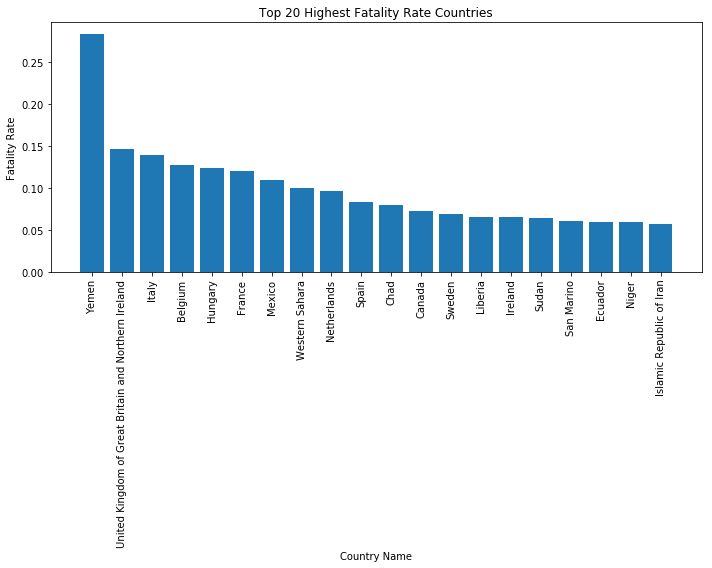

In [ ]:
#Using Bar Chart
plt.figure(figsize=(10,8))
x = df_top_20_fatality_rate['name']
y = df_top_20_fatality_rate['fatality_ratio']
plt.bar(x,y)
plt.xlabel('Country Name')
plt.ylabel('Fatality Rate')
plt.title('Top 20 Highest Fatality Rate Countries')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

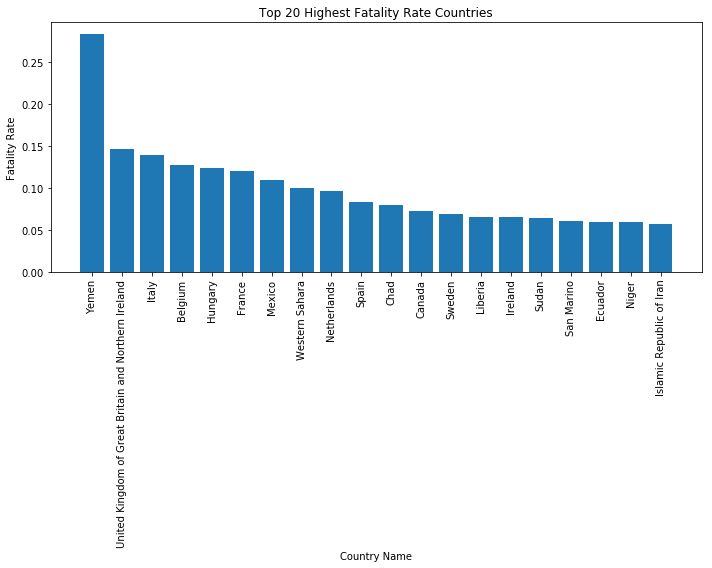

In [ ]:
#Using Bar Chart
plt.figure(figsize=(10,8))
x = df_top_20_fatality_rate['name']
y = df_top_20_fatality_rate['fatality_ratio']
plt.bar(x,y)
plt.xlabel('Country Name')
plt.ylabel('Fatality Rate')
plt.title('Top 20 Highest Fatality Rate Countries')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
# Futhermore, comparing the covid19 cases in indonesia with neighboring countries,namely:
# ME -> Malaysia,
# SG -> Singapore,
# TH -> Thailand,
# VN -> Vietnam.

countries = ['ID','MY','SG','TH','VN']
i = 0
for country in countries:
    covid_timeline_url = 'https://covid19-api.org/api/timeline/'+country
    df_covid_timeline = pd.io.json.json_normalize(get_json(covid_timeline_url))
    df_covid_timeline['last_update'] = pd.to_datetime(df_covid_timeline['last_update'], format='%Y-%m-%dT%H:%M:%S')
    df_covid_timeline['last_update'] = df_covid_timeline['last_update'].apply(lambda x: x.date())
    
    if i == 0 :
        df_covid_timeline_merged = df_covid_timeline
    else:
        df_covid_timeline_merged = df_covid_timeline.append(df_covid_timeline_merged, ignore_index=True)
    i += 1
print(df_covid_timeline_merged.head())

   cases country  deaths last_update  recovered
0   1036      VN      30  2020-08-27        637
1   1034      VN      29  2020-08-26        632
2   1029      VN      27  2020-08-25        592
3   1022      VN      27  2020-08-24        587
4   1016      VN      27  2020-08-23        563


In [ ]:
## Merge covid data with country data
df_covid_timeline_denormalized = pd.merge(df_covid_timeline_merged, df_countries, on='country')
df_covid_timeline_denormalized 

,cases,country,deaths,last_update,recovered,name
0,1036,VN,30,2020-08-27,637,Viet Nam
1,1034,VN,29,2020-08-26,632,Viet Nam
2,1029,VN,27,2020-08-25,592,Viet Nam
3,1022,VN,27,2020-08-24,587,Viet Nam
4,1016,VN,27,2020-08-23,563,Viet Nam
5,1014,VN,26,2020-08-22,563,Viet Nam
6,1009,VN,25,2020-08-21,545,Viet Nam
7,1007,VN,25,2020-08-20,542,Viet Nam
8,994,VN,25,2020-08-19,533,Viet Nam
9,989,VN,26,2020-08-18,526,Viet Nam


In [ ]:
# Covid-19 cases in ASEAN in March 2020
import datetime
df_covid_timeline_denormalized = df_covid_timeline_denormalized[(df_covid_timeline_denormalized['last_update'] >= datetime.date(2020,3,1))]
df_covid_timeline_denormalized.head()

,cases,country,deaths,last_update,recovered,name
0,1036,VN,30,2020-08-27,637,Viet Nam
1,1034,VN,29,2020-08-26,632,Viet Nam
2,1029,VN,27,2020-08-25,592,Viet Nam
3,1022,VN,27,2020-08-24,587,Viet Nam
4,1016,VN,27,2020-08-23,563,Viet Nam


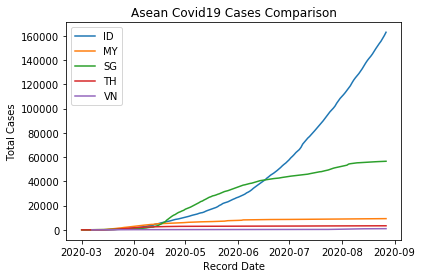

In [ ]:
plt.clf()
countries = ['ID','MY','SG','TH','VN']
for country in countries:
    country_data = df_covid_timeline_denormalized['country']== country
    x = df_covid_timeline_denormalized[country_data]['last_update']
    y = df_covid_timeline_denormalized[country_data]['cases']
    plt.plot(x,y,label=country)
    
plt.legend()
plt.xlabel('Record Date')
plt.ylabel('Total Cases')
plt.title('Asean Covid19 Cases Comparison')
plt.show()